In [14]:
import pandas as pd
from fbprophet import Prophet
import seaborn as sns

In [2]:
df = pd.read_csv("global-temperature-time-series.csv", sep=";")

In [3]:
df = df[df.Source == "GISTEMP"].sort_values("Date")

In [4]:
df = df.drop("Source", axis=1)
df.columns = ["ds", "y"]

In [5]:
train = df[df["ds"] <= "2013-01-01"]
actual = df[df["ds"] > "2013-01-01"]

In [6]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(24, freq="M")
forecast = m.predict(future)

In [8]:
forecast_lower = forecast[["ds", "yhat_lower"]]
forecast_lower["src"] = "yhat_lower"
forecast_lower.columns = ["ds", "y", "src"]
forecast_upper = forecast[["ds", "yhat_upper"]]
forecast_upper["src"] = "yhat_upper"
forecast_upper.columns = ["ds", "y", "src"]

forecast = forecast[forecast["ds"] > "2013-01-01"][["ds", "yhat"]]
forecast.columns = ["ds", "y"]

forecast["src"] = "forecast"
train["src"] = "training"
actual["src"] = "actual"

/Users/csefalvayk/Developer/tableau-ds-demos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/csefalvayk/Developer/tableau-ds-demos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/csefalvayk/Developer/tableau-ds-demos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [9]:
forecast_upper = forecast_upper[forecast_upper["ds"] > "2013-01-01"][["ds", "y", "src"]]
forecast_lower = forecast_lower[forecast_lower["ds"] > "2013-01-01"][["ds", "y", "src"]]

In [10]:
res = pd.concat([train, actual, forecast, forecast_lower, forecast_upper])

In [11]:
res.ds = pd.to_datetime(res.ds)

In [12]:
res.to_csv("temps.csv")

<AxesSubplot:xlabel='ds', ylabel='y'>

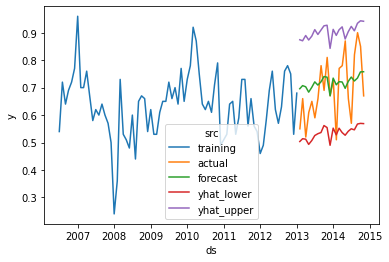

In [23]:
sns.lineplot(x="ds", y="y", hue="src", data=res[(res["ds"] >= "2006-07-01") & (res["ds"] < "2014-11-16")])